# Smarte interaktive Skripte (smartiS)

[P. Kersten](https://www.hshl.de/personen/prof-dr-ing-peter-kersten), J. Jeschonowski, L.P. Kamegne-Kamdem, N.B. Neathery und D.M. Weis

[Hochschule Hamm-Lippstadt](https://www.hshl.de), Marker Allee 76–78, D-59063 Hamm

## Elastischer Stoß
- Geschwindigkeiten nach einem elastischen Stoß berechnen
- Spezialfall: Elastischer Stoß zweier Körper mit gleicher Masse
- Knowledge Check(s)

In [7]:
%matplotlib inline
import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.optimize
from ipywidgets import interact
from sympy import symbols
from sympy.plotting import plot3d
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from IPython.display import Markdown, clear_output, display, HTML

In [8]:
javascript_funktion = {False: "hide()", True: "show()"}
schaltflaeche  = {False: "Quellcode anzeigen", True: "Quellcode verbergen"}


def quellcode_umschalten(state):

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_funktion[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))


def schaltflaeche_aktion(value):

    state = value.new
    quellcode_umschalten(state)
    value.owner.description = schaltflaeche[state]


state = False
quellcode_umschalten(state)

button = widgets.ToggleButton(state, description = schaltflaeche[state])
button.observe(schaltflaeche_aktion, "value")

display(button)

ToggleButton(value=False, description='Quellcode anzeigen')

## Geschwindigkeiten nach einem elastischen Stoß berechnen


Bei vollkommen elastischen Stößen bleibt neben dem **Impuls** auch die **kinetische Energie** erhalten. Für ein System mit zwei Massen $m_1$ und $m_2$ können wir somit zwei Gleichungen formulieren:

$m_1 \cdot v_{1A}+m_2 \cdot v_{2A} = m_1 \cdot v_{1E}+m_2 \cdot v_{2E}$ (Impulserhaltung) <br>

$\frac{1}{2} \, m_1 \cdot v_{1A}^2 + \frac{1}{2} \, m_2 \cdot v_{2A}^2 = \frac{1}{2} \, m_1 \cdot v_{1E}^2 + \frac{1}{2} \, m_2 \cdot v_{2E}^2$ (Energieerhaltung) <br>

Hierbei sind $v_{1A}$ und $v_{2A}$ die Geschwindigkeiten der beiden Massen $m_1$ und $m_2$ vor dem Stoß und $v_{2E}$ und $v_{1E}$ die Geschwindigkeiten der beiden Massen nach dem Stoß. Durch Lösen dieses quadratischen Gleichungssystems können die Geschwindigkeiten nach dem Stoß berechnet werden.


Generell kann man aus der Impuls und der Energieerhaltung ableiten, dass für den elastischen Stoß folgendes gilt:

$v_{1A}-v_{2A}=v_{2E}-v_{1E}$

Der Betrag der Relativgeschwindigkeit nach dem Stoß enstpricht dem Betrag der Relativgeschwindigkeiten vor dem Stoß.

In [9]:
def f(m1, m2, v1A, v2A):

    v1E, v2E = sp.symbols("v1E, v2E")

    equations = [
        sp.Eq(m1*v1A+m2*v2A , m1*v1E+m2*v2E ),
        sp.Eq(1/2*m1*v1A**2 +1/2*m2*v2A**2, 1/2*m1*v1E**2+1/2*m2*v2E**2 ),
        ]
    print(sp.solve(equations))
    


interact(f, m1 = widgets.IntSlider(value=2, min=0, max=10, step=1), 
            m2 = widgets.IntSlider(value=4, min=0, max=10, step=1),
            v1A = widgets.IntSlider(value=1, min=-10, max=10, step=1),
            v2A = widgets.IntSlider(value=3, min=-10, max=10, step=1))


interactive(children=(IntSlider(value=2, description='m1', max=10), IntSlider(value=4, description='m2', max=1…

<function __main__.f(m1, m2, v1A, v2A)>

### Spezialfall: Elastischer Stoß zweier Körper mit gleicher Masse

Für den Spezialfall gleicher Massen ($m_1=m_2$) vereinfachen sich die obigen Gleichungen zu:


$v_{1A} + v_{2A} = v_{1E}+  v_{2E}$ (Impulserhaltung) <br>

$v_{1A}^2 + v_{2A}^2 = v_{1E}^2 + v_{2E}^2$ (Energieerhaltung) <br>

Diese quadratische Gleichungssystem hat die Lösungen $v_{1E}=v_{1A}$ und $v_{2E}=v_{2A}$ sowie $v_{1E}=v_{2A}$ und $v_{2E}=v_{1A}$. Der erste Fall, bei dem die Geschwindigkeiten unverändert bleiben, löst das Gleichungssystem natürlich auch. Im zweiten Fall tauschen die Massen ihre Geschwindigkeiten aus. Dieser Fall, bei zwei Körper mit gleichen Massen ihre Geschwindigkeiten austauschen, wird in den Abbildungen 1, 2 und 3 schematisch dargestellt. 




<br> 
Abbildung 1 zeigt den elastischen Stoß der Masse $m_1$ (schwarz), die mit der Geschwindigkeit $v$ auf die ruhende Masse $m_2$ (rot) trifft. Nach dem Stoß bleibt die Masse $m_1$ stehen und die Masse $n_2$ bewegt sich mit der Geschwindigkeit $v$. <br> <br>

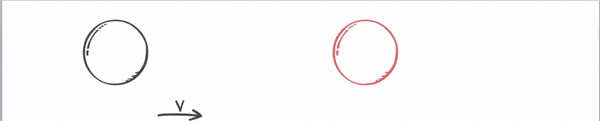

<p style="text-align: center;">Abbildung 1: Eine bewegte Kugel stößt elastisch auf eine ruhende Kugel</p>

<br>

Abbildung 2 zeigt den elastischen Stoß der Masse $m_1$ (schwarz), die sich mit der Geschwindigkeit $v$ auf die Masse $m_2$ (rot) zubewegt, die sich mit der Geschwindigkeit $-v/2$ (also in die entgegengesetzte Richtung) auf die Masse $m_1$ zubewegt. Auch in diesem Fall werden die Geschwindigkeiten ausgetauscht.
<br>

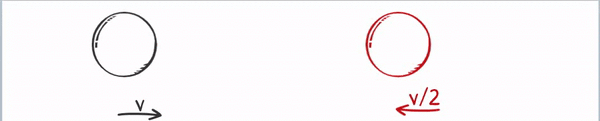

<p style="text-align: center;">Abbildung 2: Zwei Kugel stoßen mit entgegengesetzten Geschwindigkeiten aufeinander zu</p>

Abbildung 3 zeigt schließlich den elastischen Stoß der Masse $m_1$ (schwarz), die sich mit der Geschwindigkeit $v$ auf die Masse $m_2$ (rot) zubewegt, die sich in gleicher Richtung bewegt, jedoch nur mit der halben Geschwindigkeit ($v/2$). Auch in diesem Fall werden die Geschwindigkeiten ausgetauscht.


<br>

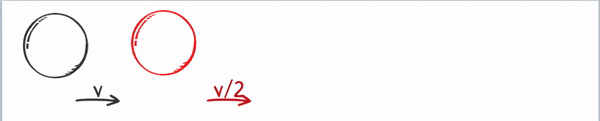

<p style="text-align: center;">Abbildung 3: Zwei Kugel stoßen mit unterschiedlich Geschwindigkeiten aufeinander zu</p>


## Knowledge Check(s)
### Zwei Kugeln treffen eleastisch aufeinander

Eine Kugel der Masse $m_1=4\,\text{kg}$ trifft elastisch mit einer Geschwindigkeit von $v_{1A}=5\,\text{m/s}$ auf eine zweite Kugel der Masse $m_2=7\,\text{kg}$, die sich mit einer Geschwindigkeit von von $v_{2A}=2\,\text{m/s}$ in die gleiche Richtung bewegt. Berechnen Sie die Geschwindigkeiten $v_{1E}$ und $v_{2E}$ nach dem Stoß. Überprüfen Sie Ihr Ergebnis durch Einstellen der Schieberegler. 

### Zwei Billiardkugeln

Beim Billiardspielen treffen Sie mit der weißen Billiardkugel auf die (ruhende) schwarze Billiardkugel. Beide Kugeln haben die gleiche Masse. Was beobachten Sie(die Rotationsenergie der Kugeln wollen wir hier vernachlässigen)? Überprüfen Sie Ihre Aussage mithilfe eines Beispiels. Wählen Sie gleich Massen und Verändern Sie die Geschwindigkeiten mit den Schiebereglern.

Oktober 2020 (CC BY-SA 4.0)